# MinCiencias: Filosofía

Este cuaderno repite el análisis previo de la base de datos de investigadores en Colombia, pero ahora centrándose únicamente en aquellos que declaran filosofía como área de especialización.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 100 # Ajusta la resolución de las figuras
plt.style.use('ggplot')   # Usa el estilo de ggplot

In [6]:
df = pd.read_csv('Investigadores_Reconocidos_por_convocatoria.csv')

df = df[df['NME_AREA_ESP_GR'] == 'Filosofía'] # Agregamos restricción a las personas de filosofía

In [7]:
df.head()

,NME_CONVOCATORIA,ANO_CONVO,NME_GENERO_PR,NME_PAIS_NAC_PR,NME_REGION_NAC_PR,NME_DEPARTAMENTO_NAC_PR,NME_MUNICIPIO_NAC_PR,COD_DANE_NAC_PR,ID_NIV_FORM_PR,NME_NIV_FORM_PR,...,NME_REGION_GR,NME_DEPARTAMENTO_GR,NME_MUNICIPIO_GR,COD_DANE_GR,ID_AREA_CON_GR,NME_AREA_ESP_GR,NME_AREA_GR,NME_GRAN_AREA_GR,ID_PERSONA_PR,ID_CONVOCATORIA
2,Convocatoria 640 de 2013,01/01/2013,Masculino,Colombia,Eje Cafetero,Caldas,Aguadas,17013,3,Maestría/Magister,...,Pacífico,Cauca,Popayán,19001.0,6E02,Filosofía,Otras humanidades,Humanidades,702269,16
20,Convocatoria 640 de 2013,01/01/2013,Masculino,Colombia,Eje Cafetero,Antioquia,La Estrella,5380,4,Doctorado,...,Eje Cafetero,Antioquia,Medellín,5001.0,6E02,Filosofía,Otras humanidades,Humanidades,428922,16
101,Convocatoria 640 de 2013,01/01/2013,Masculino,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001,4,Doctorado,...,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,6E02,Filosofía,Otras humanidades,Humanidades,411477,16
163,Convocatoria 640 de 2013,01/01/2013,Masculino,Colombia,Eje Cafetero,Antioquia,Caldas,5129,4,Doctorado,...,Eje Cafetero,Antioquia,Medellín,5001.0,6E02,Filosofía,Otras humanidades,Humanidades,94676,16
250,Convocatoria 640 de 2013,01/01/2013,Femenino,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001,5,Postdoctorado,...,Eje Cafetero,Antioquia,Medellín,5001.0,6E02,Filosofía,Otras humanidades,Humanidades,42854,16


# Limpieza

El año de la convocatoria se da como una fecha del primero de enero de cada año. Podemos convertir esa variable para capturar únicamente el año.

In [8]:
df['ANO_CONVO'] = df['ANO_CONVO'].apply(lambda x: x[-4:])

También hay un problema con la codificación de los datos de postdoctorado: aparecen dos registros diferentes, `Postdoctorado` y `Postdoctorado/Estancia postdoctoral`. Debemos unificar estos registros.

In [9]:
df['NME_NIV_FORM_PR'].unique()

array(['Maestría/Magister', 'Doctorado', 'Postdoctorado',
       'Postdoctorado/Estancia postdoctoral', 'Especialización',
       'Pregrado/Universitario'], dtype=object)

In [10]:
df['NME_NIV_FORM_PR'].replace('Postdoctorado/Estancia postdoctoral', 'Postdoctorado', inplace=True)

Hay datos extraños con la variable `Edad`. Vamos a eliminar los datos de personas que aparecen como mayores a 100 años o menores a 15.

In [11]:
df['EDAD_ANOS_PR'] = np.where(df['EDAD_ANOS_PR'] > 100, None, df['EDAD_ANOS_PR'])

# Descriptivos generales

Text(0.5, 0, 'Año de convocatoria')

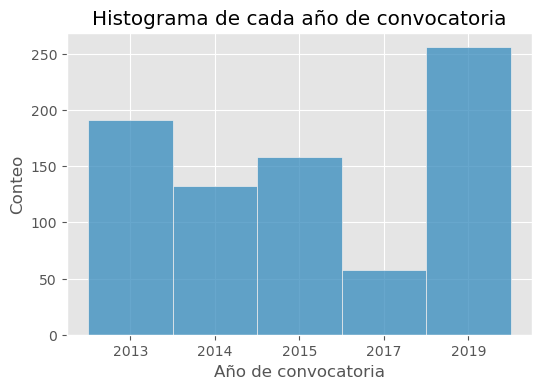

In [12]:
sns.histplot(df['ANO_CONVO'])

plt.title("Histograma de cada año de convocatoria")
plt.ylabel("Conteo")
plt.xlabel("Año de convocatoria")

Text(0.5, 0, 'Género')

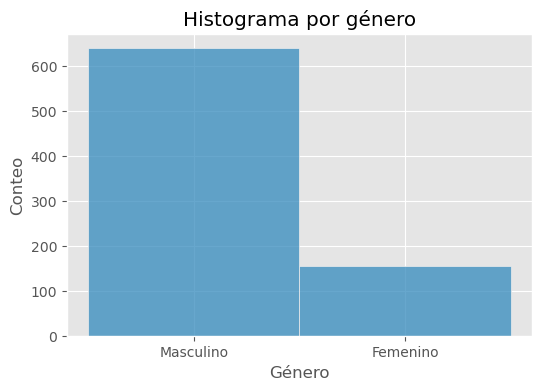

In [13]:
sns.histplot(df['NME_GENERO_PR'])

plt.title("Histograma por género")
plt.ylabel("Conteo")
plt.xlabel("Género")

A continuación de presentan los datos de edad. Se dividen por año para observar que la edad media no ha cambiado significativamente, pero sí que cada vez hay más investigadores menores de 40 años.

Text(0.5, 0, 'Edad')

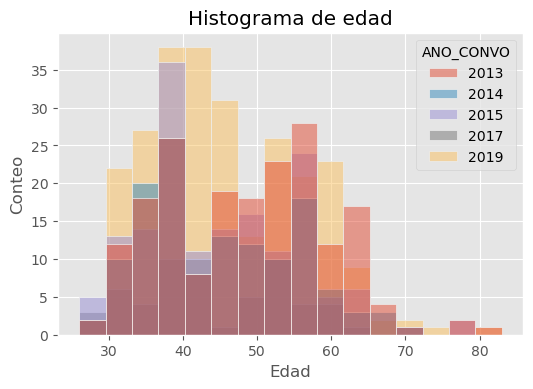

In [14]:
sns.histplot(x = df['EDAD_ANOS_PR'], hue=df['ANO_CONVO'])

plt.title("Histograma de edad")
plt.ylabel("Conteo")
plt.xlabel("Edad")


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

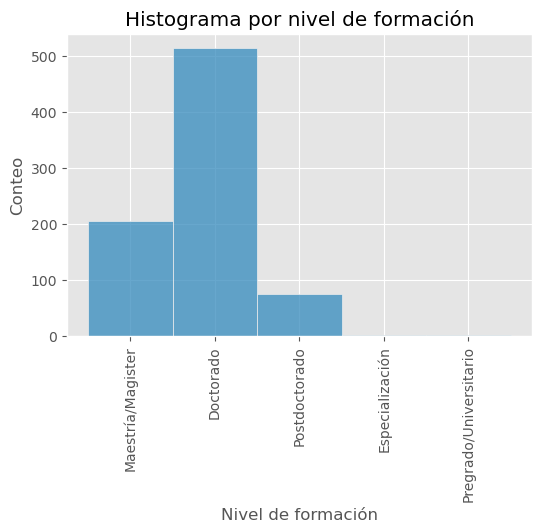

In [15]:
sns.histplot(df['NME_NIV_FORM_PR'])

plt.title("Histograma por nivel de formación")
plt.ylabel("Conteo")
plt.xlabel("Nivel de formación")

plt.xticks(rotation = 90)

Estos datos no nos dicen mucho, pues hay personas que están apareciendo en varias convocatorias. Miremos estos datos en más detalle.

# Datos por género

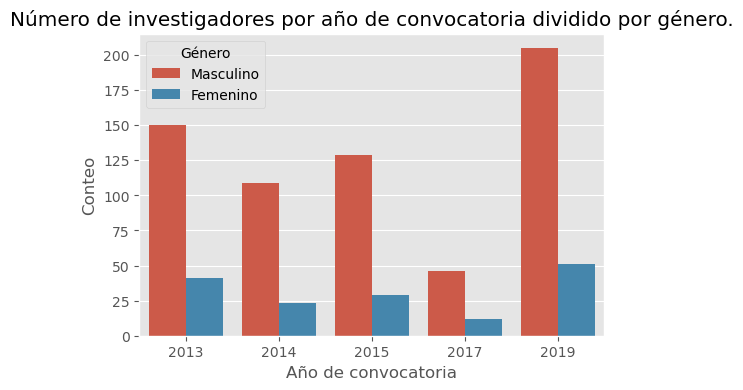

In [16]:
sns.countplot(x = df['ANO_CONVO'], hue=df['NME_GENERO_PR'])

plt.title("Número de investigadores por año de convocatoria dividido por género.")
plt.ylabel("Conteo")
plt.xlabel("Año de convocatoria")
plt.legend(title="Género")

## ¿Ha aumentado la brecha de género en los últimos años?

Primero, miremos la diferencia absoluta entre hombres investigadores y mujeres investigadoras por año.

Text(0.5, 0, 'Año de convocatoria')

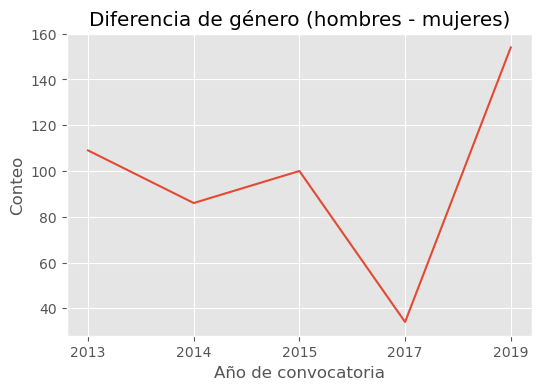

In [17]:
df_genero = pd.crosstab(df['ANO_CONVO'], df['NME_GENERO_PR']).diff(axis = 1)

sns.lineplot(x = df_genero.index, y = df_genero['Masculino'])

plt.title("Diferencia de género (hombres - mujeres)")
plt.ylabel("Conteo")
plt.xlabel("Año de convocatoria")

La diferencia absoluta parece aumentar, pero tenemos que considerar que cada año también aumenta el número de investigadores. La pregunta realmente es si la diferencia aumenta proporcional al aumento de investigadores.

Text(0.5, 0, 'Año de convocatoria')

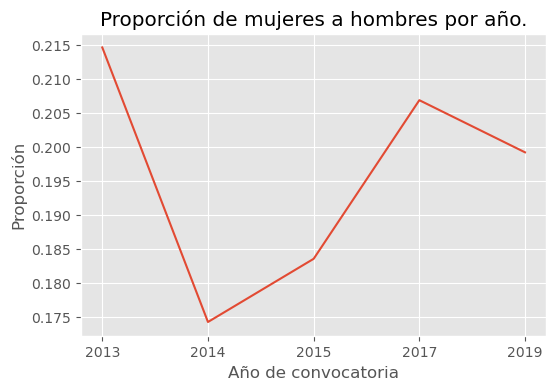

In [23]:
df_genero_norm = pd.crosstab(df['ANO_CONVO'], df['NME_GENERO_PR'], normalize='index')

sns.lineplot(x = df_genero_norm.index, y = df_genero_norm['Femenino'])

plt.title("Proporción de mujeres a hombres por año.")
plt.ylabel("Proporción")
plt.xlabel("Año de convocatoria")

Parece que poco a poco, la brecha de género se va cerrando, aunque todavía estamos por debajo de la equidad deseable (i.e., una proporción cercana al 0.5).

# Proporciones de Bogotá vs. el resto del país

In [24]:
dpto_count = df.groupby('NME_DEPARTAMENTO_GR').count()['ANO_CONVO'].sort_values(ascending=False)[:10]

Text(0.5, 0, 'Conteo')

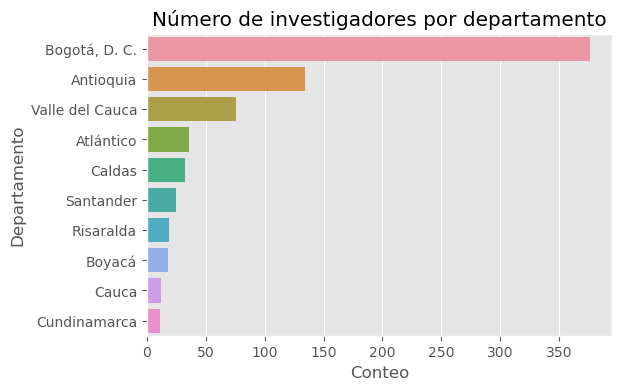

In [25]:
sns.barplot(x = dpto_count, y = dpto_count.index, orient = 'h')

plt.title('Número de investigadores por departamento')
plt.ylabel('Departamento')
plt.xlabel('Conteo')

In [26]:
dpto_ratio = pd.crosstab(df['ANO_CONVO'], df['NME_DEPARTAMENTO_GR'], normalize = 'index')

Text(0.5, 0, 'Año de convocatoria')

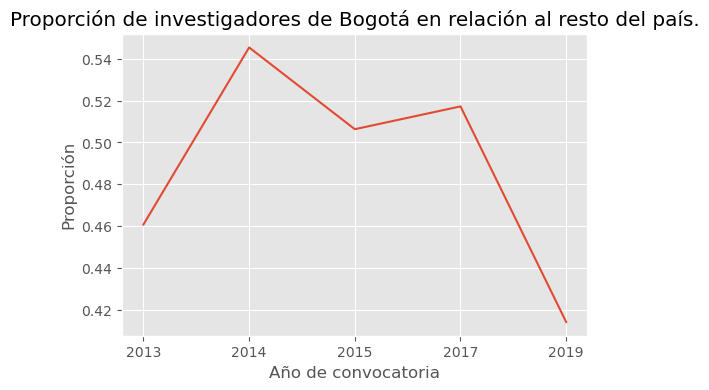

In [27]:
sns.lineplot(x = dpto_ratio.index, y = dpto_ratio['Bogotá, D. C.'])

plt.title("Proporción de investigadores de Bogotá en relación al resto del país.")
plt.ylabel("Proporción")
plt.xlabel("Año de convocatoria")